# Linear Regression for gold price price prdiction<br>
#### Lakshya Garg<br> 211000027

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Loaded Libraries

In [77]:
custom_date_parser = lambda x: datetime.strptime(x,"%d-%m-%Y")
# Custom Parser to read date time 

In [78]:
yearly=pd.read_csv('gold_yearly.csv',parse_dates=['Date'],date_parser=custom_date_parser)
print(yearly.dtypes)
yearly

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2023-01-03,1836.2,1839.7,1836.2,1839.7,1839.7
1,2022-01-01,1830.1,1852.7,1778.8,1795.0,1795.0
2,2021-01-01,1912.2,1959.9,1802.0,1847.3,1847.3
3,2020-01-01,1518.1,1604.2,1518.0,1582.9,1582.9
4,2019-01-01,1286.0,1325.4,1275.3,1319.7,1319.7
5,2018-01-01,1302.3,1362.4,1302.3,1339.0,1339.0
6,2017-02-01,1211.9,1263.1,1197.9,1252.6,1252.6
7,2016-01-01,1063.4,1125.7,1063.2,1116.4,1116.4
8,2015-01-01,1184.0,1303.5,1169.5,1278.5,1278.5
9,2014-01-01,1204.3,1269.4,1204.3,1240.1,1240.1


### Data Pre-processing <br>
Converting object(string) data type to float

In [79]:
for i in yearly.columns:
    if i=='Date':
        continue
    else:
        yearly[i]=yearly[i].replace(',','')
        yearly[i]=yearly[i].astype(float)

# yearly['High']=yearly['High'].astype(float)
# yearly['Date'].astype({'Date':int})
print(yearly.dtypes)
yearly

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
dtype: object


,Date,Open,High,Low,Close*,Adj Close**
0,2023-01-03,1836.2,1839.7,1836.2,1839.7,1839.7
1,2022-01-01,1830.1,1852.7,1778.8,1795.0,1795.0
2,2021-01-01,1912.2,1959.9,1802.0,1847.3,1847.3
3,2020-01-01,1518.1,1604.2,1518.0,1582.9,1582.9
4,2019-01-01,1286.0,1325.4,1275.3,1319.7,1319.7
5,2018-01-01,1302.3,1362.4,1302.3,1339.0,1339.0
6,2017-02-01,1211.9,1263.1,1197.9,1252.6,1252.6
7,2016-01-01,1063.4,1125.7,1063.2,1116.4,1116.4
8,2015-01-01,1184.0,1303.5,1169.5,1278.5,1278.5
9,2014-01-01,1204.3,1269.4,1204.3,1240.1,1240.1


In [80]:
yearly.sort_values('Date',ascending=True,inplace=True,ignore_index=True)
yearly

,Date,Open,High,Low,Close*,Adj Close**
0,2012-01-03,1568.9,1604.3,1566.0,1599.7,1599.7
1,2013-01-02,1672.8,1693.8,1670.0,1687.9,1687.9
2,2014-01-01,1204.3,1269.4,1204.3,1240.1,1240.1
3,2015-01-01,1184.0,1303.5,1169.5,1278.5,1278.5
4,2016-01-01,1063.4,1125.7,1063.2,1116.4,1116.4
5,2017-02-01,1211.9,1263.1,1197.9,1252.6,1252.6
6,2018-01-01,1302.3,1362.4,1302.3,1339.0,1339.0
7,2019-01-01,1286.0,1325.4,1275.3,1319.7,1319.7
8,2020-01-01,1518.1,1604.2,1518.0,1582.9,1582.9
9,2021-01-01,1912.2,1959.9,1802.0,1847.3,1847.3


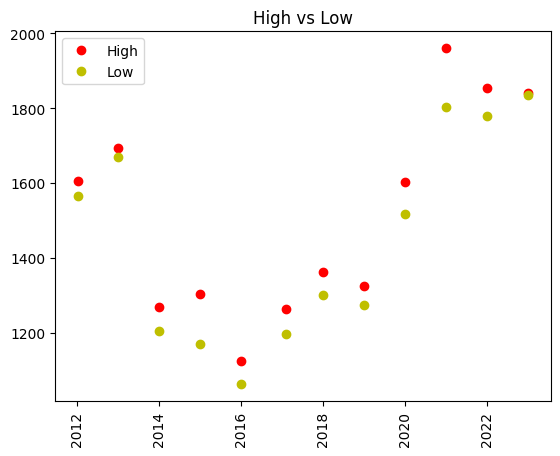

In [81]:
plt.plot(yearly['Date'],yearly['High'],'ro',label='High')
plt.plot(yearly['Date'],yearly['Low'],'yo',label='Low')
plt.xticks(rotation=90)
plt.title('High vs Low')
plt.legend(['High','Low'])
plt.show()


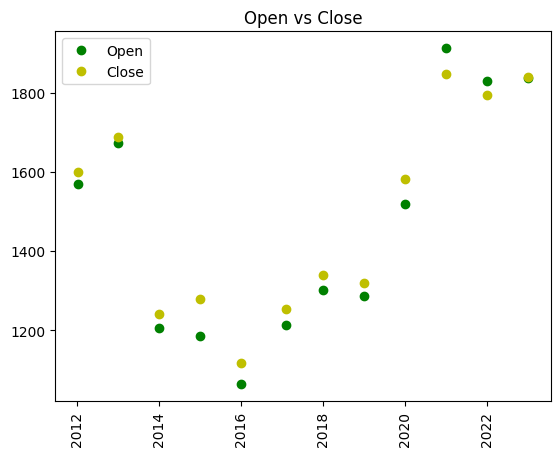

In [82]:
plt.plot(yearly['Date'],yearly['Open'],'go')
plt.plot(yearly['Date'],yearly['Close*'],'yo')
plt.xticks(rotation=90)
plt.title('Open vs Close')
plt.legend(['Open','Close'])
plt.show()

In [83]:
class LR:
    
    
    def __init__(self):
        pass    
        
    
    def fit_GD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=np.random.randint(np.min(y_train),np.max(y_train))
        for k in range(epochs):
            cost_history.append(self.MSE(y_train,self.predict(X_train)))
            # for i in range(X_train.shape[0]):
            new_weights=np.average((np.matmul(X_train,self.weights)+self.bias-y_train)*self.weights)
            # for i in range(X_train.shape[0]):
            new_bias=np.average((np.matmul(X_train,self.weights)+self.bias-y_train))

                
            # for j in range(X_train.shape[1]):
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train,self.predict(X_train)))
        return cost_history


    def fit_direct(self,X_train,y_train):
        X_train_orig=X_train
        X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
        self.weights=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.bias=self.weights[-1]
        self.weights=self.weights[0:-1]
        return self.MSE(y_train,self.predict(X_train_orig))


    
    def predict(self,X_test):
        return np.matmul(X_test,self.weights)+self.bias
        
    
    def MSE(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)/a.shape[0]
    # function for Mean Square Error Calculation 
    # It involves no loops it is faster (vectorized)
    


In [84]:
X_train=pd.DataFrame()
temp=[]
for index,i in enumerate(yearly['Date']):
    temp.append(index)

X_train['Date']=pd.DataFrame(temp)
y_train=yearly['High']
X_train.shape[0]
# y_train
# model.MSE(np.array([2.3,8.9]),np.array([9,8]))

12

In [85]:
model_implemented=LR()
graph_GD=model_implemented.fit_GD(X_train,y_train,  20,0.003)
model_scikit=linear_model.LinearRegression() #Implemented Linear Regression
model_scikit.fit(X_train,y_train) #Direct Computation using matrix inversion

LinearRegression()

In [86]:
y_pred_implemented=model_implemented.predict(X_train)
y_pred_scikit=model_scikit.predict(X_train)
print(model_implemented.weights,"Weight/s by GD")
print(model_implemented.bias,"Bias by GD")



[23.77303324] Weight/s by GD
1385.6092485673369 Bias by GD


In [87]:
print(model_implemented.MSE(y_train,y_pred_implemented))
print(mean_squared_error(y_train,y_pred_scikit))
print("Comparing MSE from scikit-direct weights calculation vs GD implemented")

55214.01501699066
52574.90999320124
Comparing MSE from scikit-direct weights calculation vs GD implemented


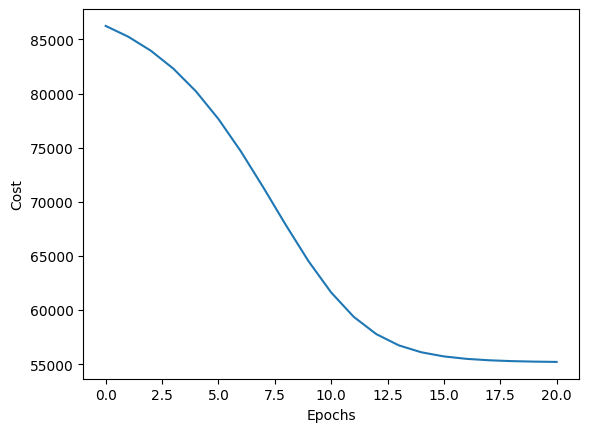

In [88]:
plt.plot(graph_GD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [89]:
print(model_implemented.fit_direct(X_train,y_train))
print(mean_squared_error(y_train,y_pred_scikit))
print("MSE same by direct method for my implementation and scikit both")

52574.90999320124
52574.90999320124
MSE same by direct method for my implementation and scikit both


In [90]:
print("Prediction for Next Year")
model_implemented.predict([X_train.shape[0]+1])

Prediction for Next Year


1806.909557109557